In [4]:
!pip install opencv-python==4.11.0.86

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 36.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

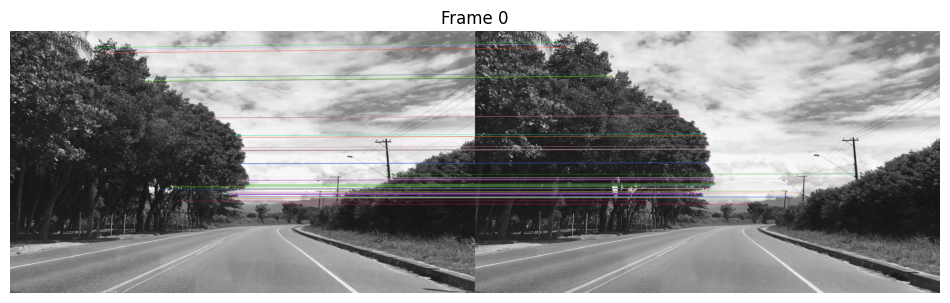

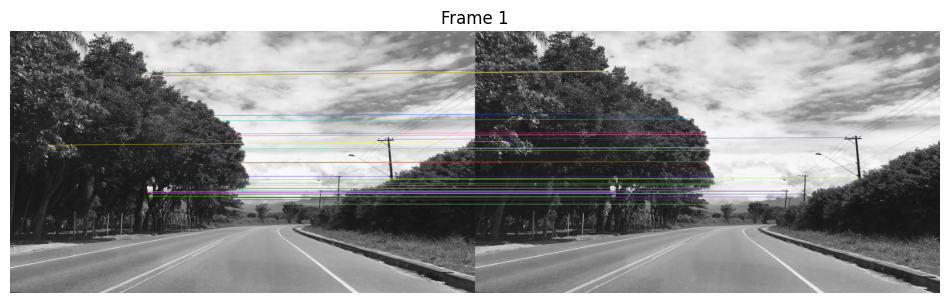

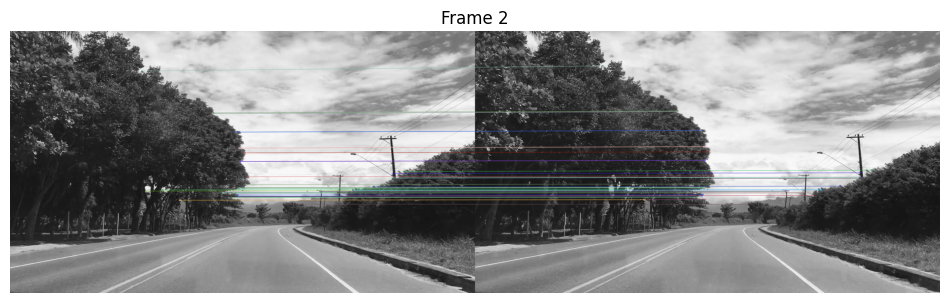

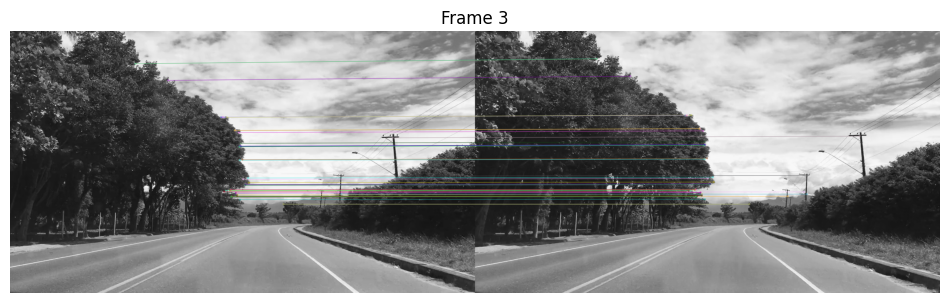

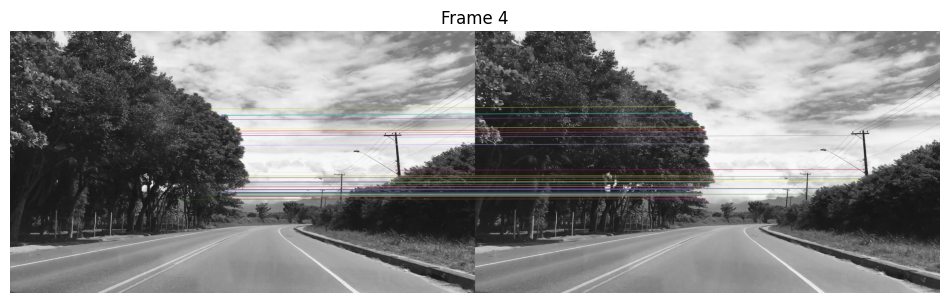

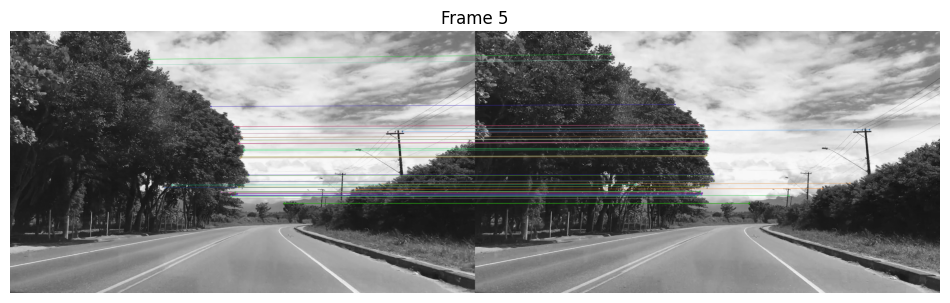

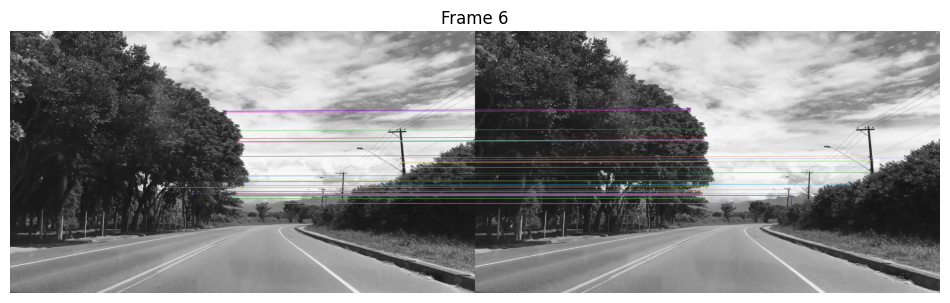

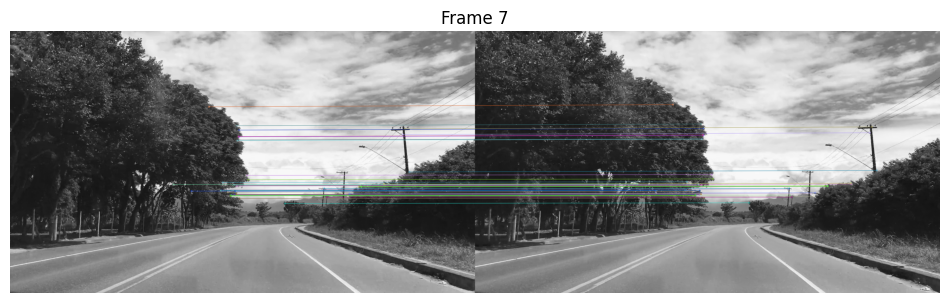

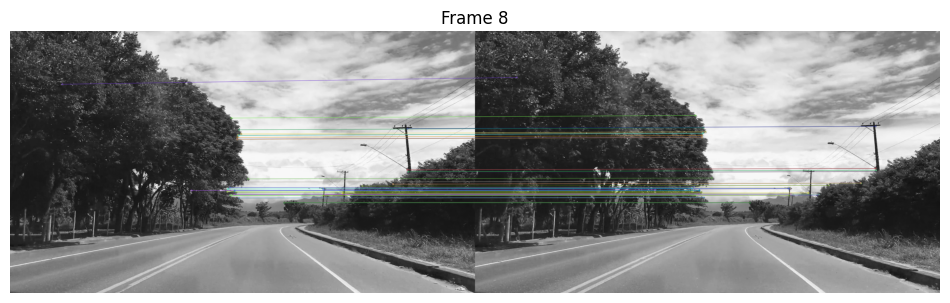

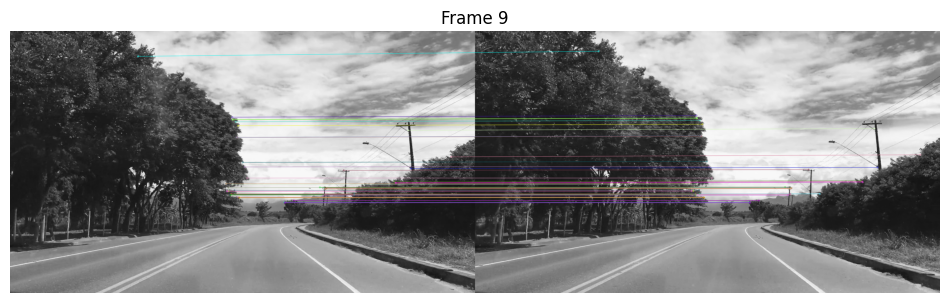

In [28]:
# ORB
orb = cv2.ORB_create(nfeatures=2000)

# Brute Force Matcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

cap = cv2.VideoCapture("drive.mp4")

ret, prev_frame = cap.read()
if not ret:
    print("Video okunamadı.")
    cap.release()
else:
    prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
    prev_kp, prev_des = orb.detectAndCompute(prev_gray, None)

    frame_count = 0
    while cap.isOpened() and frame_count < 10:
        ret, frame = cap.read()
        if not ret:
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        kp, des = orb.detectAndCompute(gray, None)

        matches = bf.match(prev_des, des)
        matches = sorted(matches, key=lambda x: x.distance)

        match_img = cv2.drawMatches(prev_gray, prev_kp, gray, kp, matches[:50], None, flags=2)

        match_img_rgb = cv2.cvtColor(match_img, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(12, 6))
        plt.title(f"Frame {frame_count}")
        plt.imshow(match_img_rgb)
        plt.axis('off')
        plt.show()

        prev_gray = gray
        prev_kp = kp
        prev_des = des
        frame_count += 1

    cap.release()


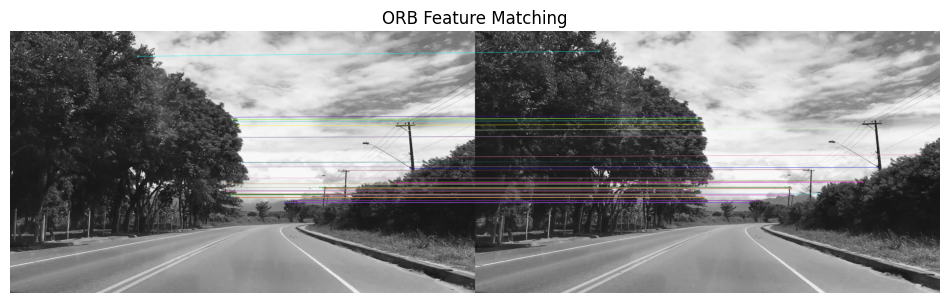

In [31]:
plt.figure(figsize=(12, 6))
plt.imshow(cv2.cvtColor(match_img, cv2.COLOR_BGR2RGB))
plt.title("ORB Feature Matching")
plt.axis('off')
plt.show()

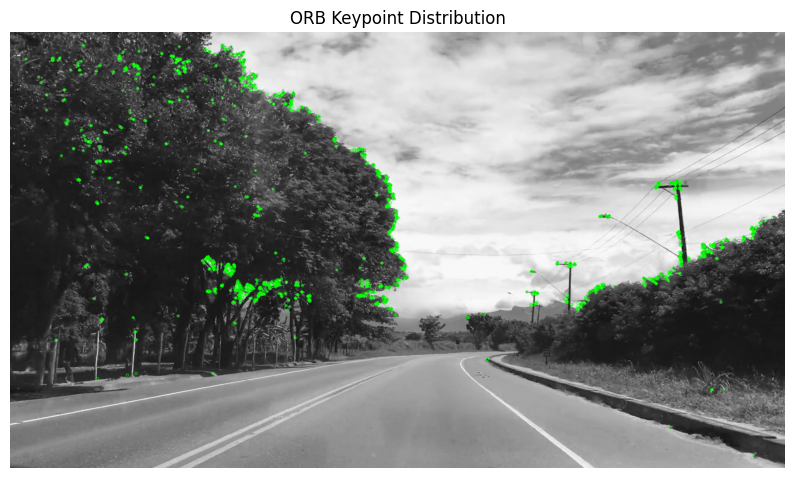

In [34]:
img = prev_gray.copy()
kp_img = cv2.drawKeypoints(img, prev_kp, None, color=(0,255,0), flags=0)

plt.figure(figsize=(10,6))
plt.title("ORB Keypoint Distribution")
plt.imshow(kp_img, cmap='gray')
plt.axis('off')
plt.show()

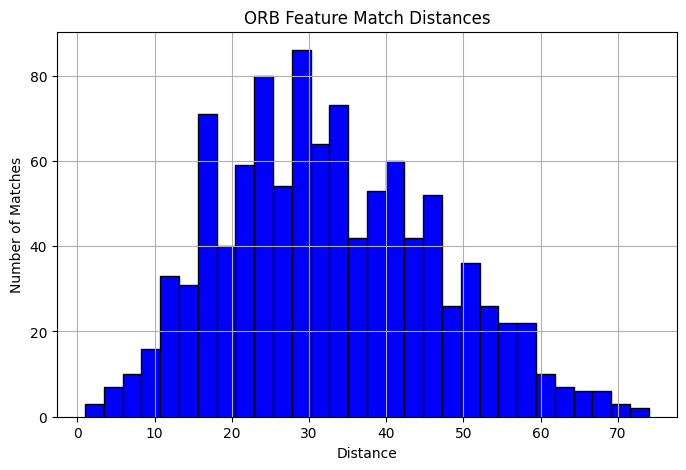

In [37]:
distances = [m.distance for m in matches]

plt.figure(figsize=(8,5))
plt.hist(distances, bins=30, color='blue', edgecolor='black')
plt.title("ORB Feature Match Distances")
plt.xlabel("Distance")
plt.ylabel("Number of Matches")
plt.grid(True)
plt.show()

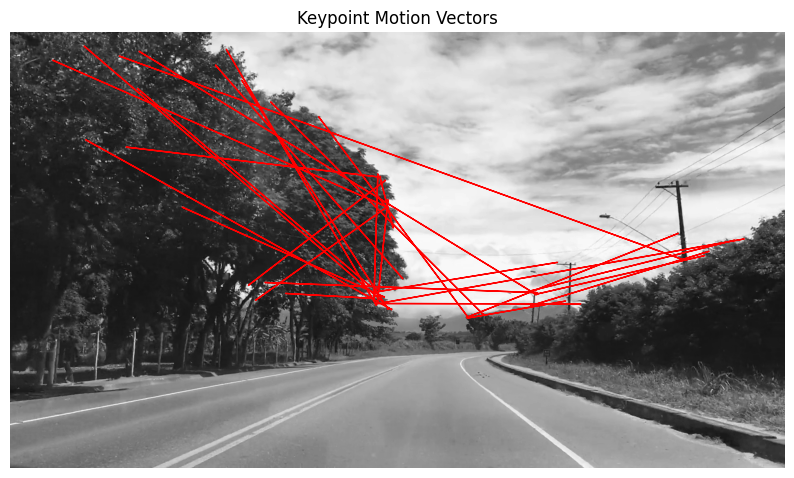

In [40]:
plt.figure(figsize=(10, 6))
plt.imshow(prev_gray, cmap='gray')
plt.title("Keypoint Motion Vectors")

for m in matches[:30]:  # İlk 30 eşleşme için çiz
    pt1 = prev_kp[m.queryIdx].pt
    pt2 = kp[m.trainIdx].pt
    plt.arrow(pt1[0], pt1[1], pt2[0]-pt1[0], pt2[1]-pt1[1],
              color='red', head_width=2, head_length=3)

plt.axis('off')
plt.show()